In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

In [11]:
caminho_arquivo_excel = 'volume_hora.xlsx'
dados_excel = pd.read_excel(caminho_arquivo_excel)
print(dados_excel.head())

                   ds     y
0 2023-07-21 00:00:00  3808
1 2023-07-21 01:00:00  3888
2 2023-07-21 02:00:00  3832
3 2023-07-21 03:00:00  3800
4 2023-07-21 04:00:00  3928


In [17]:
data = pd.read_excel(caminho_arquivo_excel)
df = pd.DataFrame(data, columns=['ds','y'])
df

,ds,y
0,2023-07-21 00:00:00,3808
1,2023-07-21 01:00:00,3888
2,2023-07-21 02:00:00,3832
3,2023-07-21 03:00:00,3800
4,2023-07-21 04:00:00,3928
...,...,...
3466,2023-12-12 10:00:00,3504
3467,2023-12-12 11:00:00,3456
3468,2023-12-12 12:00:00,3336
3469,2023-12-12 13:00:00,3480


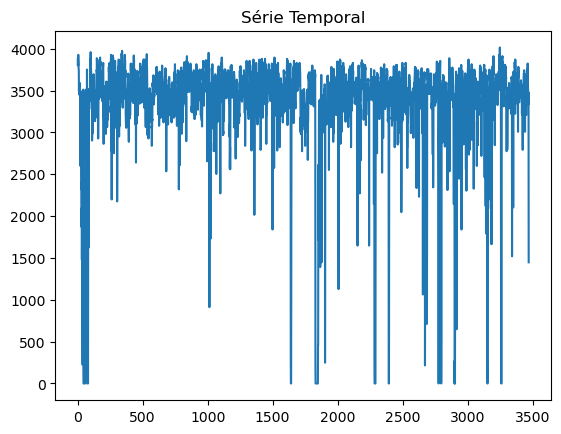

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=50958.159, Time=2.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54389.677, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50990.269, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=52495.018, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66342.030, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=50957.818, Time=1.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=51748.703, Time=3.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=50958.246, Time=0.89 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=50959.179, Time=1.49 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=51384.769, Time=4.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=50956.184, Time=2.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=50954.198, Time=0.89 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=50956.148, Time=1.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=50958.148, Time=2.68 sec
 ARIMA(2,0,0)(0,0,0

C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


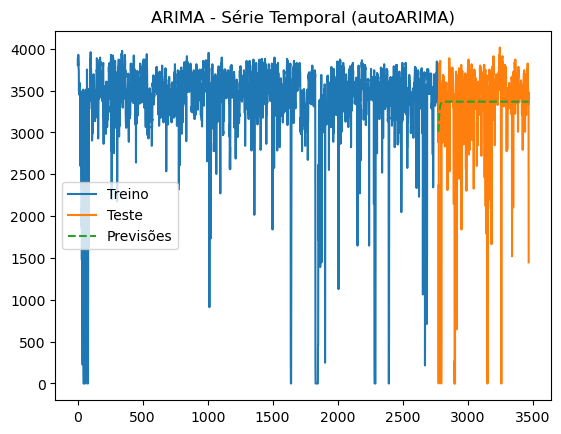

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Substitua 'seu_arquivo.xlsx' pelo caminho do seu arquivo Excel
caminho_arquivo_excel = 'volume_hora.xlsx'

# Carregue os dados da planilha Excel em um DataFrame do pandas
data = pd.read_excel(caminho_arquivo_excel)

# Crie um DataFrame com colunas específicas ('data' e 'volume')
df = pd.DataFrame(data, columns=['ds', 'y'])

# Visualize a série temporal
plt.plot(df['y'])
plt.title('Série Temporal')
plt.show()

# Encontre os melhores parâmetros do modelo ARIMA usando auto_arima
autoarima_model = auto_arima(df['y'], trace=True, suppress_warnings=True)
order = autoarima_model.order

# Divida a série temporal em treino e teste
train_size = int(len(df) * 0.8)
train, test = df['y'][:train_size], df['y'][train_size:]

# Ajuste do modelo ARIMA com os melhores parâmetros
model = ARIMA(train, order=order)
fit_model = model.fit()

# Faça previsões
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Visualize as previsões em comparação com os dados reais
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(predictions, label='Previsões', linestyle='dashed')
plt.title('ARIMA - Série Temporal (autoARIMA)')
plt.legend()
plt.show()


In [22]:
mae = mean_absolute_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')

MAE: 328.5663096492427
MAPE: 2.5977573981305197e+17
RMSE: 628.1065893471581
